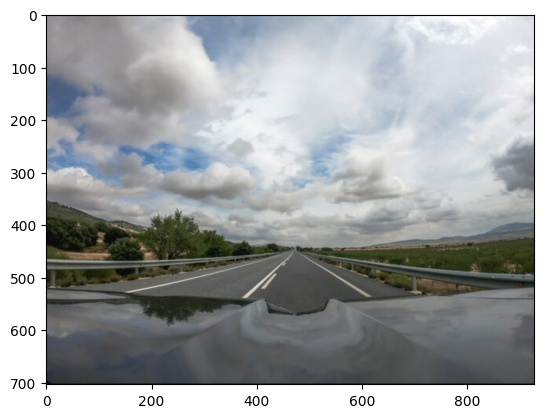

In [ ]:
img2_1 = cv2.imread('data\\2.1.jpg')
plt.imshow(cv2.cvtColor(img2_1, cv2.COLOR_BGR2RGB))

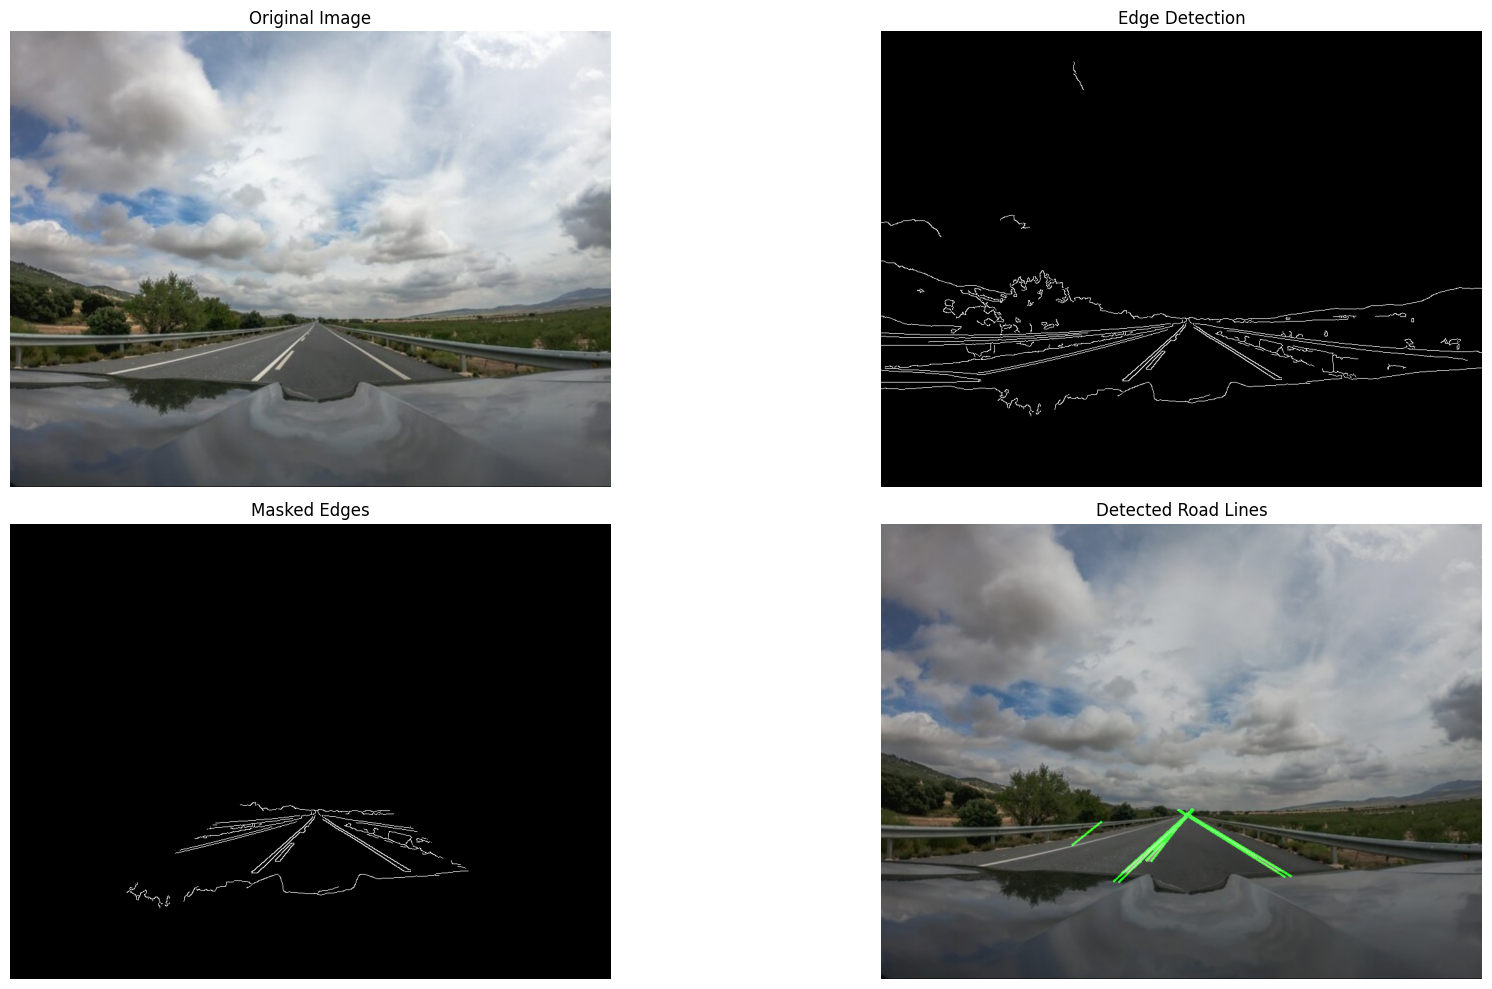

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[0, 255, 0], thickness=2):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def filter_lines(lines, min_slope, max_slope):
    filtered_lines = []
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                if x2 - x1 == 0:
                    slope = float('inf')
                else:
                    slope = (y2 - y1) / (x2 - x1)
                if min_slope < abs(slope) < max_slope:
                    filtered_lines.append(line)
    return filtered_lines

def detect_road_lines(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    imshape = image.shape
    vertices = np.array([[(0, imshape[0]), (imshape[1] // 2, imshape[0] // 2), 
                          (imshape[1] // 2, imshape[0] // 2), (imshape[1], imshape[0])]], 
                        dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)
    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=15, minLineLength=40, maxLineGap=20)
    min_slope = 0.5
    max_slope = float('inf')
    filtered_lines = filter_lines(lines, min_slope, max_slope)

    line_image = np.copy(image) * 0
    draw_lines(line_image, filtered_lines)

    color_edges = np.dstack((edges, edges, edges)) 

    combo = cv2.addWeighted(image, 0.8, line_image, 1, 0) 

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(masked_edges, cmap='gray')
    plt.title('Masked Edges')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(combo, cv2.COLOR_BGR2RGB))
    plt.title('Detected Road Lines')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

detect_road_lines(img2_1)


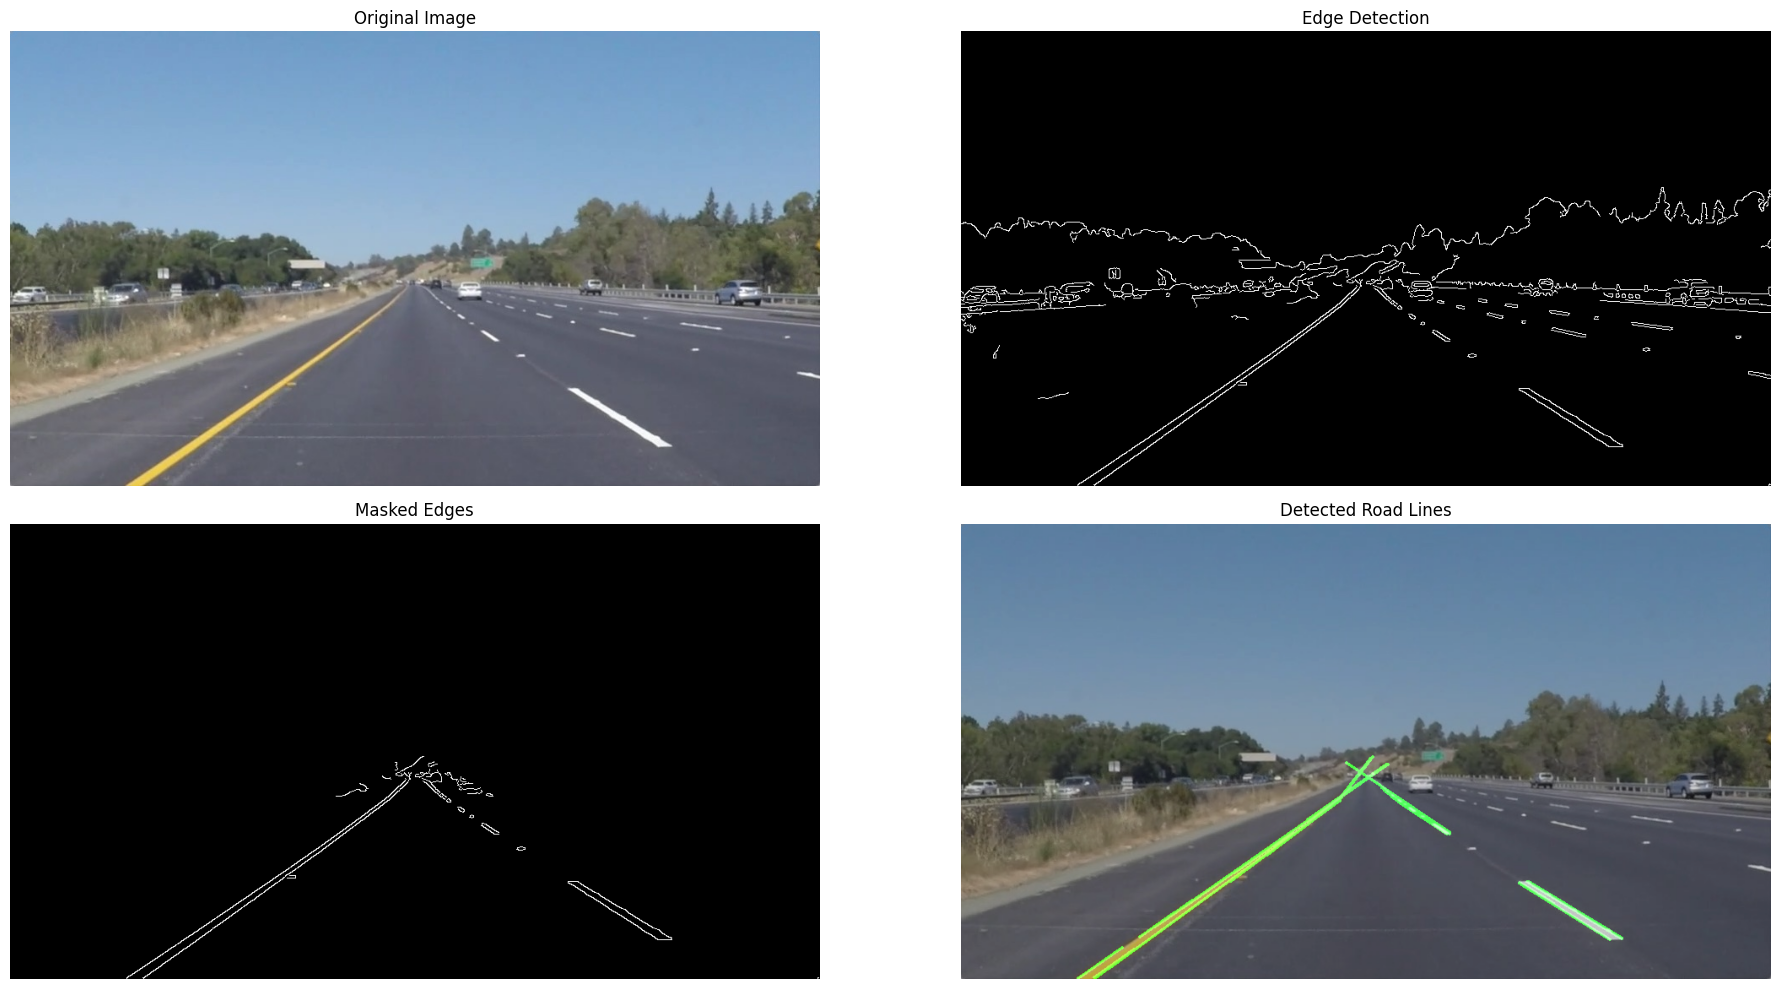

In [ ]:
img2_2 = cv2.imread('data\\2.2.jpg')
detect_road_lines(img2_2)


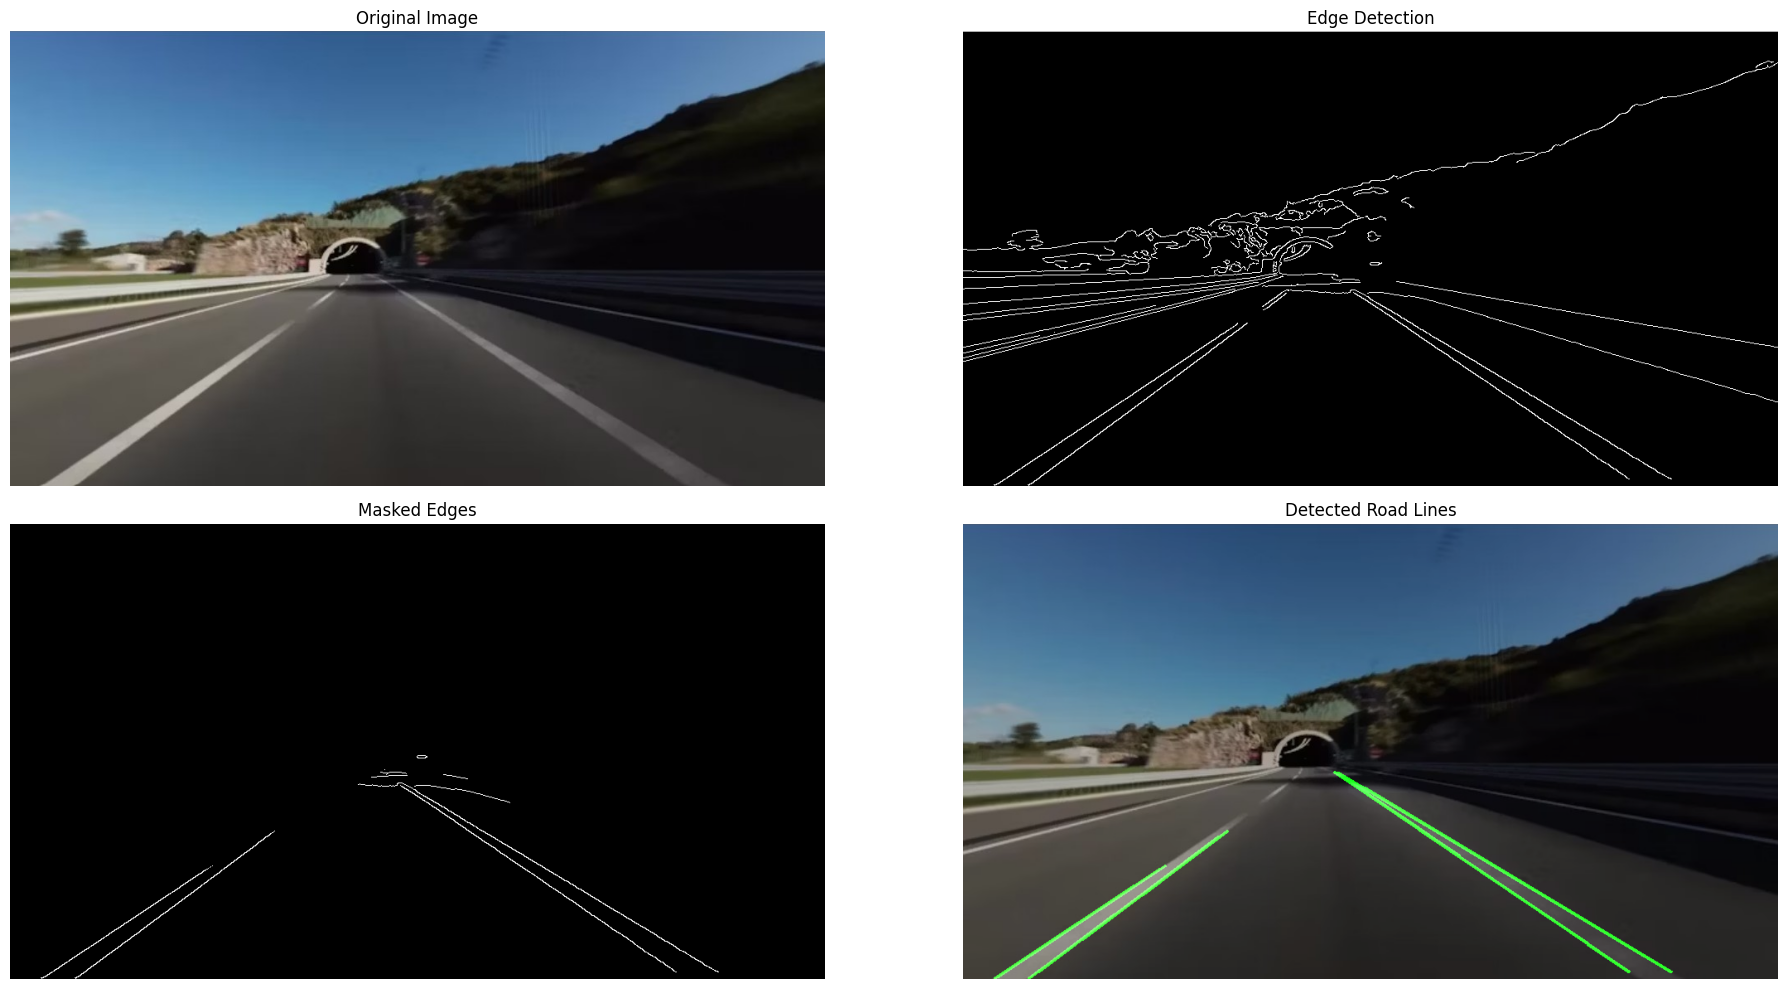

In [ ]:
img2_3 = cv2.imread('data\\2.3.jpg')
detect_road_lines(img2_3)

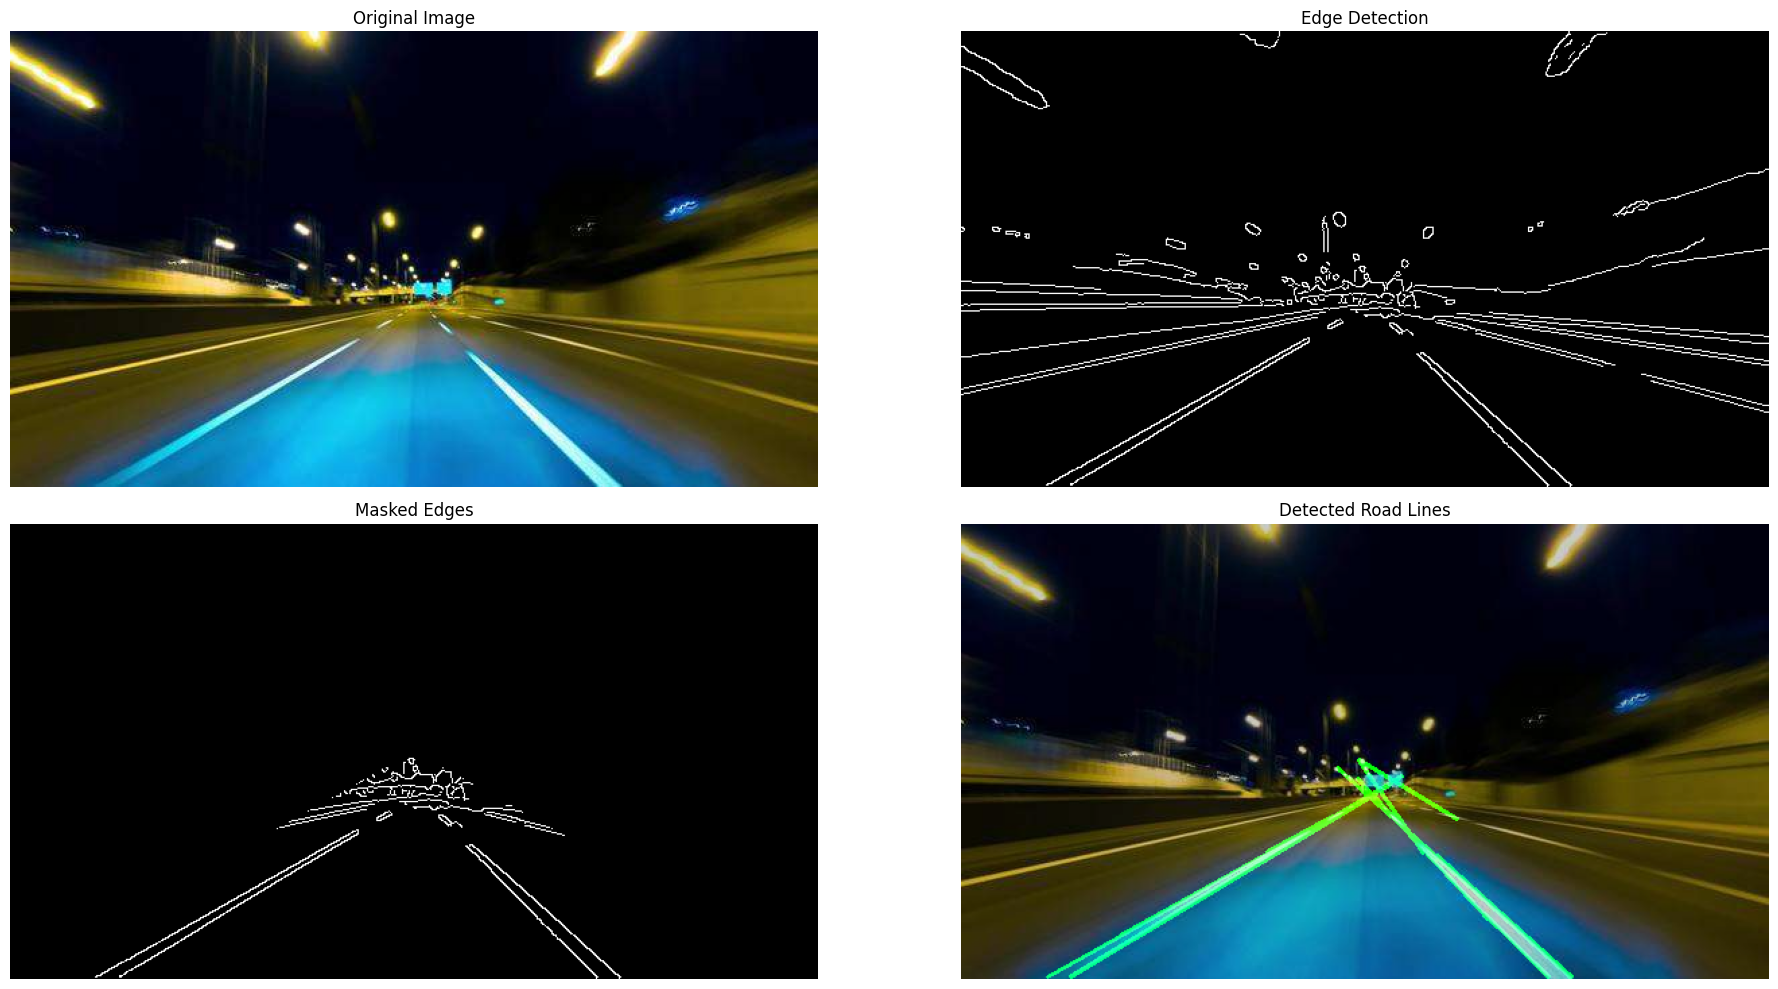

In [ ]:
img2_4 = cv2.imread('data\\2.4.jpg')
detect_road_lines(img2_4)

In [ ]:
len(img2_5.shape)

3

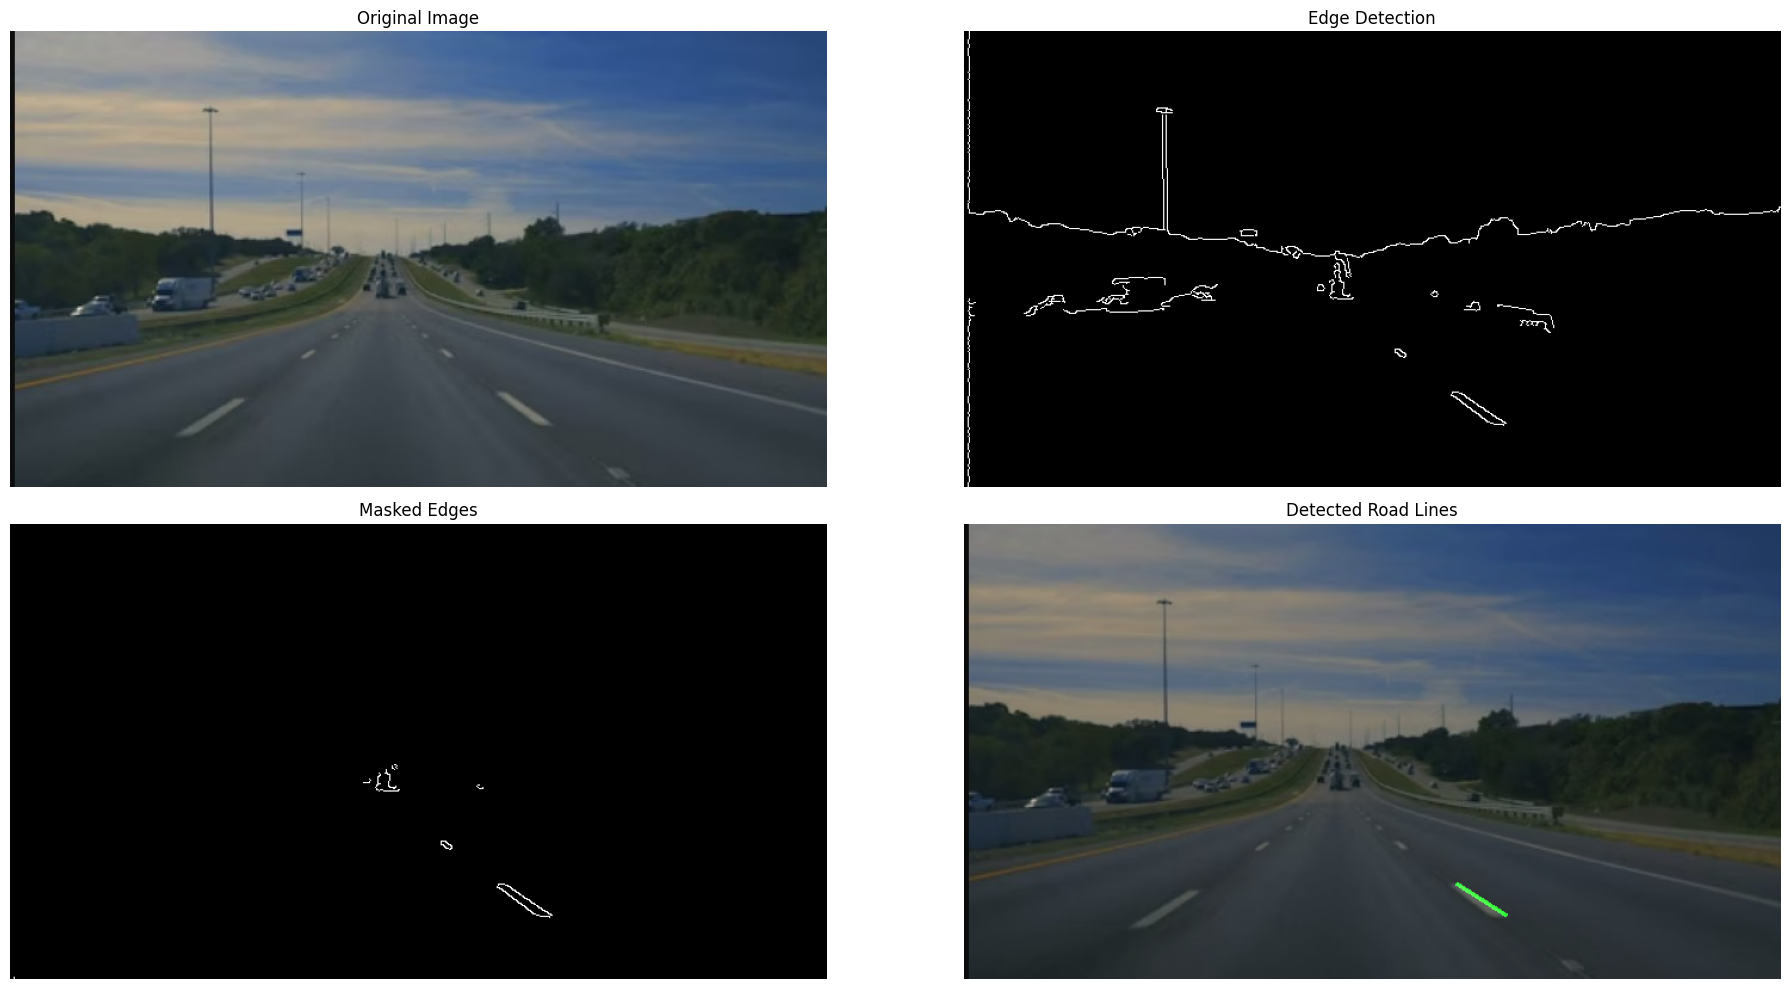

In [ ]:
img2_5 = cv2.imread('data\\2.5.jpg')
detect_road_lines(img2_5)

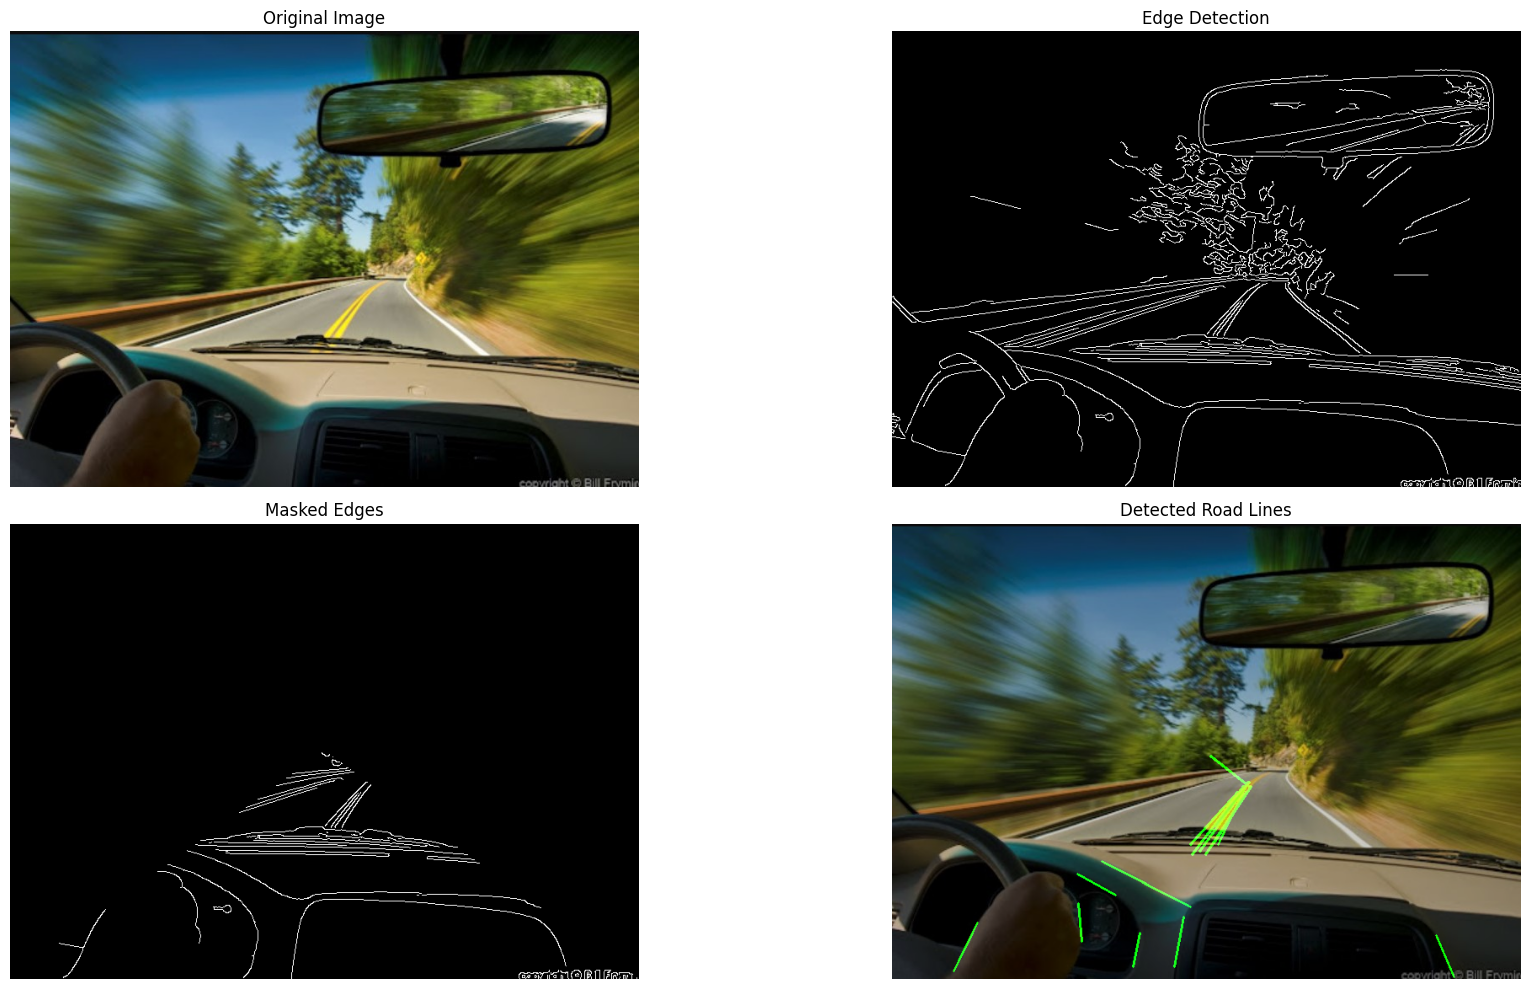

In [ ]:
img2_6 = cv2.imread('data\\2.6.jpg')
detect_road_lines(img2_6)